In [29]:
#getting needed libraries 
import pandas as pd
#pip install numpy
import numpy as np
import matplotlib.pyplot as plt 
from scipy.spatial import ConvexHull

In [36]:
# Import enthalpy data

# define end members
endmember1 = "MnH"
endmember2 = "H"

# define compounds
# compounds: dictionary that has a compound identifier and lists the composition in terms of endmembers
compounds = {"MnH": [1,0], "H": [0,1], "MnH2": [1,1], "MnH3":[1,2], "MnH4": [1,3],"MnH5":[1,4], "MnH6":[1,5], "MnH7":[1,6], "MnH8":[1,7]}
#compounds = {"MnH": [1,0], "H": [0,1], "MnH2": [1,1], "MnH3":[1,2], "MnH4": [1,3], "MnH7":[1,6], "MnH8":[1,7]}

phases = {}
phase_enthalpies = {}
enthalpies = {}

# import enthalpies for compounds with only a single dataset/phase
# phases: dictionary that lists the structures for each compound (most often labeled by space group symbol)
# phase_enthalpies: dictionary that has the enthalpy data for each structure
# enthalpy data needs to be a simple two-column text file listing pressure (in GPa) and VASP 'free energy' (normalized by composition as stated in compounds above)
phases["MnH"] = ["MnH"]
phase_enthalpies["MnH"] = [np.loadtxt("/Users/guilhermegarcia/GLCGarcia documents /University /3rd year 2023 /Summer Development Internship /Convex Hull analysis/Mn Analysis/energiesMnH.dat")]
phases["MnH2"] = ["MnH2"]
phase_enthalpies["MnH2"] = [np.loadtxt("/Users/guilhermegarcia/GLCGarcia documents /University /3rd year 2023 /Summer Development Internship /Convex Hull analysis/Mn Analysis/energiesMnH2.dat")]
#phases["MnH3"] = ["MnH3"]
#phase_enthalpies["MnH3"] = [np.loadtxt("/Users/guilhermegarcia/GLCGarcia documents /University /3rd year 2023 /Summer Development Internship /Convex Hull analysis/Mn Analysis/energiesMnH3.dat")]
phases["MnH4"] = ["MnH4"]
phase_enthalpies["MnH4"] = [np.loadtxt("/Users/guilhermegarcia/GLCGarcia documents /University /3rd year 2023 /Summer Development Internship /Convex Hull analysis/Mn Analysis/energiesMnH4.dat")]
phases["MnH5"] = ["MnH5"]
phase_enthalpies["MnH5"] = [np.loadtxt("/Users/guilhermegarcia/GLCGarcia documents /University /3rd year 2023 /Summer Development Internship /Convex Hull analysis/Mn Analysis/energiesMnH5-test-structure.dat")]
phases["MnH8"] = ["MnH8"]
phase_enthalpies["MnH8"] = [np.loadtxt("/Users/guilhermegarcia/GLCGarcia documents /University /3rd year 2023 /Summer Development Internship /Convex Hull analysis/Mn Analysis/energiesMnH8.dat")]
#phase_enthalpies["MnH8"] = [np.loadtxt("/Users/guilhermegarcia/GLCGarcia documents /University /3rd year 2023 /Summer Development Internship /Convex Hull analysis/Mn Analysis/G_vs_p.dat")]
# import enthalpies for compounds with multiple phases
phases["H"] = ["P63m", "C2c"]
phase_enthalpies["H"] = [np.loadtxt("/Users/guilhermegarcia/GLCGarcia documents /University /3rd year 2023 /Summer Development Internship /Convex Hull analysis/Fe Analysis/energiesHp63.dat"), np.loadtxt("/Users/guilhermegarcia/GLCGarcia documents /University /3rd year 2023 /Summer Development Internship /Convex Hull analysis/Fe Analysis/energiesHc2c.dat")]

phases["MnH3"] = ["I4m", "Pm-3m"]
phase_enthalpies["MnH3"] = [np.loadtxt("/Users/guilhermegarcia/GLCGarcia documents /University /3rd year 2023 /Summer Development Internship /Convex Hull analysis/Mn Analysis/energiesMnH3.dat"), np.loadtxt("/Users/guilhermegarcia/GLCGarcia documents /University /3rd year 2023 /Summer Development Internship /Convex Hull analysis/Mn Analysis/energiesMnH3-Pm-3m.dat")]

phases["MnH7"] = ["P63mcm", "Pmmn"]
phase_enthalpies["MnH7"] = [np.loadtxt("/Users/guilhermegarcia/GLCGarcia documents /University /3rd year 2023 /Summer Development Internship /Convex Hull analysis/Mn Analysis/energiesMnH7-P63mcm.dat"), np.loadtxt("/Users/guilhermegarcia/GLCGarcia documents /University /3rd year 2023 /Summer Development Internship /Convex Hull analysis/Mn Analysis/energiesMnH7-Pmmn.dat")]


phases["MnH5"] = ["I4mmm", "C2m"]
phase_enthalpies["MnH5"] = [np.loadtxt("/Users/guilhermegarcia/GLCGarcia documents /University /3rd year 2023 /Summer Development Internship /Convex Hull analysis/Mn Analysis/energiesMnH5-Kvashnin.dat"),np.loadtxt("/Users/guilhermegarcia/GLCGarcia documents /University /3rd year 2023 /Summer Development Internship /Convex Hull analysis/Mn Analysis/energiesMnH5-test-structure.dat")]

phases["MnH6"] = ["Cmmm", "C2m"]
phase_enthalpies["MnH6"] = [np.loadtxt("/Users/guilhermegarcia/GLCGarcia documents /University /3rd year 2023 /Summer Development Internship /Convex Hull analysis/Mn Analysis/energiesMnH6-Cmmm.dat"), np.loadtxt("/Users/guilhermegarcia/GLCGarcia documents /University /3rd year 2023 /Summer Development Internship /Convex Hull analysis/Mn Analysis/energiesMnH6-C2m.dat")]

#phases["CoH3"] = ["Cmmm", "Imma", "P21m", "P213"]
#phase_enthalpies["FeH4"] = [np.loadtxt("/Users/guilhermegarcia/GLCGarcia documents /University /3rd year 2023 /Summer Development Internship /Fe Analysis/energiesFeH4-Cmmm.dat"), np.loadtxt("/Users/guilhermegarcia/GLCGarcia documents /University /3rd year 2023 /Summer Development Internship /Fe Analysis/energiesFeH4-Imma.dat"), np.loadtxt("/Users/guilhermegarcia/GLCGarcia documents /University /3rd year 2023 /Summer Development Internship /Fe Analysis/energiesFeH4-P21m.dat"), np.loadtxt("/Users/guilhermegarcia/GLCGarcia documents /University /3rd year 2023 /Summer Development Internship /Fe Analysis/energiesFeH4-P213.dat")]

    
#######################################################

#print(phase_enthalpies["H"][0][:,1])
#Normnalize for structure , numbers of Co's or number of H'set

phase_enthalpies["H"][0][:,1]=phase_enthalpies["H"][0][:,1]/16
phase_enthalpies["H"][1][:,1]=phase_enthalpies["H"][1][:,1]/24
phase_enthalpies["MnH"][0][:,1] = phase_enthalpies["MnH"][0][:,1]/2
phase_enthalpies["MnH2"][0][:,1] = phase_enthalpies["MnH2"][0][:,1]/4
phase_enthalpies["MnH3"][0][:,1] = phase_enthalpies["MnH3"][0][:,1]/8
phase_enthalpies["MnH3"][1][:,1] = phase_enthalpies["MnH3"][1][:,1]/1
phase_enthalpies["MnH4"][0][:,1] = phase_enthalpies["MnH4"][0][:,1]/3
phase_enthalpies["MnH5"][0][:,1] = phase_enthalpies["MnH5"][0][:,1]/4
phase_enthalpies["MnH5"][1][:,1] = phase_enthalpies["MnH5"][1][:,1]/4
phase_enthalpies["MnH6"][0][:,1] = phase_enthalpies["MnH6"][0][:,1]/4
phase_enthalpies["MnH6"][1][:,1] = phase_enthalpies["MnH6"][1][:,1]/4
phase_enthalpies["MnH7"][0][:,1] = phase_enthalpies["MnH7"][0][:,1]/2
phase_enthalpies["MnH7"][1][:,1] = phase_enthalpies["MnH7"][1][:,1]/2
phase_enthalpies["MnH8"][0][:,1] = phase_enthalpies["MnH8"][0][:,1]/4

#print (phase_enthalpies["CoH2"])

# get pressure values, from end members
pressures = phase_enthalpies[endmember1][0][:,0]

# get stoichiometries and save compound names
stoichiometry = {}
stoich_names = {}
for cmpd in compounds.keys():
    stoich = compounds[cmpd][1]/(compounds[cmpd][0]+compounds[cmpd][1])
    stoichiometry[cmpd] = stoich
    stoich_names[stoich] = cmpd

# get minimal enthalpies for each multi-phase compound
for cmpd in phases.keys():
    print(cmpd, ": ", phases[cmpd])
    enth_tmp = np.ones([len(pressures),1+len(phases[cmpd])])*np.inf
    enth_tmp[:,0] = pressures
    for i, phase in enumerate(phases[cmpd]):
        for ip,p in enumerate(pressures):
            if p in phase_enthalpies[cmpd][i]:
                enth_tmp[ip,i+1] = phase_enthalpies[cmpd][i][np.where(phase_enthalpies[cmpd][i][:,0] == p)[0][0],1]
    enth_best = np.ones([len(pressures),2])*np.inf
    enth_best[:,0] = pressures
    enth_best[:,1] = [np.min(enth_tmp[x,1:]) for x in range(len(pressures))]
    enthalpies[cmpd] = enth_best
    #print (enthalpies)


MnH :  ['MnH']
MnH2 :  ['MnH2']
MnH4 :  ['MnH4']
MnH5 :  ['I4mmm', 'C2m']
MnH8 :  ['MnH8']
H :  ['P63m', 'C2c']
MnH3 :  ['I4m', 'Pm-3m']
MnH7 :  ['P63mcm', 'Pmmn']
MnH6 :  ['Cmmm', 'C2m']
[-24.147047   -23.27374975 -22.46274575 -21.6863005  -20.93582275
 -20.20650475 -19.495431   -18.8004205  -18.1196735  -17.44954875
 -16.7937225  -15.51407225 -14.27221475 -13.06366475 -11.88480375
 -10.73270875  -9.60496575  -8.49957125  -7.41147075  -6.34559575
  -5.297548    -4.266274    -3.25066925  -2.24987427  -1.2629242
  -0.289222     0.6720739    1.62152888   2.559668     3.48707875
   4.4041865    5.31032925   6.20832825   7.09723725   7.97741675
   8.84921525]


b
[ 0.          0.00555366  0.01745013  0.11461455 -0.3785366   0.05957984
  0.01875398  0.0606643   0.        ]
300.0
g
[ 0.         -0.04478806 -0.04066492  0.03565939 -0.36967295  0.02645465
 -0.04086939  0.02518198  0.        ]
500.0
r
[ 0.         -0.10930741 -0.12065779 -0.07384709 -0.30711655 -0.05087447
 -0.1133927  -0.0325373   0.        ]
1000.0
c
[ 0.         -0.13775076 -0.16135618 -0.12974213 -0.22471028 -0.08237796
 -0.14072977 -0.05940478  0.        ]
1500.0
m
[ 0.         -0.14934163 -0.184734   -0.16264345 -0.13730336 -0.09393422
 -0.15859635 -0.07947099  0.        ]
2000.0
y
[ 0.         -0.15413885 -0.20057466 -0.18499421 -0.10842146 -0.09648856
 -0.16737086 -0.09585812  0.        ]
2500.0
k
[ 0.         -0.15443506 -0.21167858 -0.20096276 -0.11099265 -0.09376235
 -0.17067339 -0.10250005  0.        ]
3000.0


<>:74: SyntaxWarning: invalid escape sequence '\D'
<>:74: SyntaxWarning: invalid escape sequence '\D'
/var/folders/tg/1rvyy6v13kq9w3s_hnykjpmc0000gp/T/ipykernel_2743/2064997472.py:74: SyntaxWarning: invalid escape sequence '\D'
  plt.ylabel("$\Delta$H$_f$ [eV/atom]")


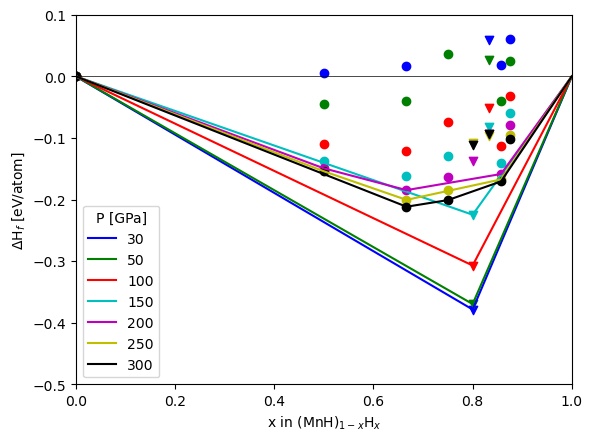

In [31]:
# Plot relative formation enthalpies

# plot these selected pressure points:
pressures_plot = ("30", "50", "100", "150", "200", "250", "300")

#######################################################

deltaHf = np.zeros([len(pressures), len(compounds), 2])

# store all relative enthalpies
for c,cmpd in enumerate(compounds.keys()):
    deltaHf[:,c,0] = compounds[cmpd][1]/(compounds[cmpd][0]+compounds[cmpd][1])
    deltaHf[:,c,1] = (enthalpies[cmpd][:,1] - compounds[cmpd][0]*enthalpies[endmember1][:,1] - compounds[cmpd][1]*enthalpies[endmember2][:,1])/(compounds[cmpd][0]+compounds[cmpd][1])

# sort relative enthalpies by stoichiometry
#print(deltaHf)

deltaHf = deltaHf[:,deltaHf[:,:,0].argsort()[0]]

# get convex hull points
hulls = [None]*len(pressures)
hullHf = [None]*len(pressures)

for ip in range(len(pressures)):
    hulls[ip] = ConvexHull(deltaHf[ip])
    # only keep hull points with non-positive enthalpy values
    hullHf[ip] = deltaHf[ip,hulls[ip].vertices[deltaHf[ip,hulls[ip].vertices,1]<=0]]
    # sort hull points by stoichiometry
    hullHf[ip] = hullHf[ip][hullHf[ip][:,0].argsort()]

# for p in pressures_plot:
#     print(deltaHf[i,:,1])
#     #idx = np.where(pressures == float(p))[0]
#     #print(idx)
#     plt.scatter(deltaHf[idx,:,0],deltaHf[idx,:,1], label = p)
#     plt.plot(hullHf[idx][:,0], hullHf[idx][:,1])

# a = 0

# for i in (6, 10, 15, 20, 25, 30, 35):
    
#     p = pressures_plot[a]
#     print(deltaHf[i,:,1])
#     print(pressures[i])
#     a = a+1
#     plt.scatter(deltaHf[i,:,0],deltaHf[i,:,1], label = p)
#     plt.plot(hullHf[i][:,0], hullHf[i][:,1])

a = 0

labels2 = ("o", "o", "o","o", "v", "v" , "o", "o","o")
#labels2 = ("o", "o", "o","o", "o","o","o")
colors = ("b", "g", "r", "c", "m", "y", "k")

for i in (6, 10, 15, 20, 25, 30, 35):
    
    p = pressures_plot[a]
    c = colors[a]
    print(c)
    print(deltaHf[i,:,1])
    print(pressures[i])
    a = a+1
    #plt.scatter(deltaHf[i,:,0],deltaHf[i,:,1], label = p, marker=float(labels2[:]) )

    for g in range((len(labels2)) - 1 ):
        l = labels2[g]
        plt.scatter(deltaHf[i,g,0],deltaHf[i,g,1], marker=l, color= c)

    plt.plot(hullHf[i][:,0], hullHf[i][:,1], label = p, color=c)
    
# plot settings
plt.plot([0,1],[0,0],color="black", linewidth = 0.5)
plt.xlabel("x in (MnH)$_{1-x}$H$_x$")
plt.ylabel("$\Delta$H$_f$ [eV/atom]")

plt.legend(title="P [GPa]")


plt.xlim((0.0,1.0))
plt.ylim(top = 0.1, bottom = -0.5)
plt.show()

MnH    0.00000:  XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
MnH2   0.50000:  -------------------ooXXXXXXXXXXXXooo
MnH3   0.66667:  --------------------ooXXXXXXXXXXXXXX
MnH4   0.75000:  -----------------------ooooooooXXXXX
MnH5   0.80000:  XXXXXXXXXXXXXXXXXXXXXXXXoo----------
MnH6   0.83333:  ------------------------------------
MnH7   0.85714:  --------------------ooXXXXXXXXXXXXXX
MnH8   0.87500:  ------------------------------------
H      1.00000:  XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
[[3000.0], [1206.0832803110923], [1320.0597527071045], [439.6742953048333], [1858.7445963873652], [0.0], [1383.4953868607934], [0.0], [3000.0]] [[0.0], [1519.0273196536357], [1679.9402472928955], [2560.3257046951667], [0.0], [0.0], [1616.5046131392066], [0.0], [0.0]]
[3000.0, 1206.0832803110923, 1320.0597527071045, 439.6742953048333, 1858.7445963873652, 0.0, 1383.4953868607934, 0.0, 3000.0] [0.0, 1519.0273196536357, 1679.9402472928955, 2560.3257046951667, 0.0, 0.0, 1616.5046131392066, 0.0, 0.0]
[[0.0], [202.6

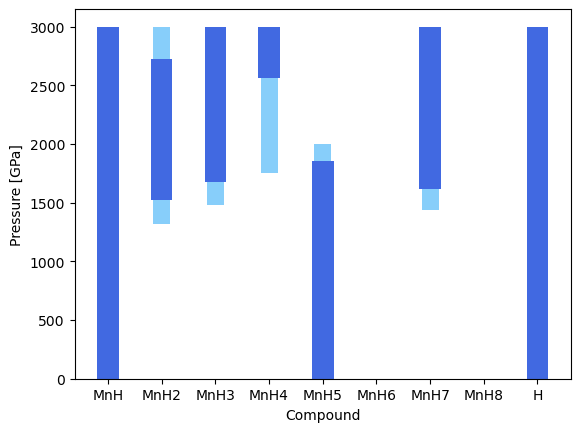

In [32]:
# Plot bar chart stability phase diagram

# define "metastability" in eV/entity distance from hull
meta = 0.03

#######################################################

# get distances from hull
deltaHull = np.ones([len(pressures),1+len(compounds)])*np.inf
deltaHull[:,0] = pressures

for ip in range(len(pressures)):
    for ic in range(len(compounds)):
        # is this composition on the hull?
        # yes - hull distance is zero
        if deltaHf[ip,ic,0] in hullHf[ip]:
            deltaHull[ip,ic+1] = 0.00

        # no - find nearest composition, work out hull distance
        else:
            idx = np.searchsorted(hullHf[ip][:,0], deltaHf[ip,ic,0])
            hull_comp_left = hullHf[ip][idx-1,0]
            hull_comp_right = hullHf[ip][idx,0]
            hull_Hf_left = hullHf[ip][idx-1,1]
            hull_Hf_right = hullHf[ip][idx,1]
            deltaHull[ip,ic+1] = deltaHf[ip,ic,1] - hull_Hf_left*(hull_comp_right - deltaHf[ip,ic,0])/(hull_comp_right-hull_comp_left) - hull_Hf_right*(deltaHf[ip,ic,0] - hull_comp_left)/(hull_comp_right-hull_comp_left)

# rudimentary text-based output of stability ranges
for ic in range(len(compounds)):
    print("{0:6s} {1:.5f}:  ".format(stoich_names[deltaHf[0,ic,0]],deltaHf[0,ic,0]), end="")
    for ip in range(len(pressures)):
        if deltaHull[ip,ic+1]==0:
            print("X", end="")
        elif deltaHull[ip,ic+1]<=meta:
            print("o", end="")
        else:
            print("-", end="")
    print("")
            
# store stable/metastable/unstable information only
trinaryHull = np.transpose(np.where(deltaHull[:,1:]>0,1,0) + np.where(deltaHull[:,1:]>meta,1,0))
# lists of lists of start/finish pressures for stable/metastable/unstable regions
pressures_stable_starts = [[] for i in range(len(compounds))]
pressures_stable_ends   = [[] for i in range(len(compounds))]
pressures_meta_starts   = [[] for i in range(len(compounds))]
pressures_meta_ends     = [[] for i in range(len(compounds))]
pressures_unstable_starts = [[] for i in range(len(compounds))]
pressures_unstable_ends   = [[] for i in range(len(compounds))]
# detect changes in stability state and interpolate the pressures
for ic in range(len(compounds)):
    # initial state of each compound
    state = trinaryHull[ic,0]
    if state == 0:
        # initially stable:
        pressures_stable_starts[ic].append(0.0)
    elif state == 1:
        # initially metastable:
        pressures_meta_starts[ic].append(0.0)
    else:
        # initially unstable
        pressures_unstable_starts[ic].append(0.0)
    
    # now loop over subsequent pressures, note changes
    for ip in range(1,len(pressures)):
        new_state = trinaryHull[ic,ip]
        # no change in state
        if new_state == state:
            continue
        # unstable -> metastable
        elif state == 2 and new_state == 1:
            # onset pressure of metastability:
            px = (meta - deltaHull[ip,ic+1])/(deltaHull[ip-1,ic+1]-deltaHull[ip,ic+1])*pressures[ip-1] + (deltaHull[ip-1,ic+1]-meta)/(deltaHull[ip-1,ic+1]-deltaHull[ip,ic+1])*pressures[ip]
            pressures_meta_starts[ic].append(px)
            pressures_unstable_ends[ic].append(px)
            #print("u>m ",ic,ip,px)
        # unstable -> stable
        elif state == 2 and new_state == 0:
            # onset pressure of stability
            # use deltaHull from previous pressure, and neighbour enthalpies from current pressure
            deltaH1 = deltaHull[ip-1,ic+1]
            # hull, neighbouring compositions
            curr_comp = deltaHf[0,ic,0]
            hull_comp_idx = np.where(hullHf[ip][:,0] == curr_comp)[0][0]
            hull_comp_left = hullHf[ip][hull_comp_idx-1,0]
            hull_comp_right = hullHf[ip][hull_comp_idx+1,0]
            hull_Hf_left = hullHf[ip][hull_comp_idx-1,1]
            hull_Hf_right = hullHf[ip][hull_comp_idx+1,1]
            deltaH2 = hullHf[ip][hull_comp_idx,1] - hull_Hf_left*(hull_comp_right - deltaHf[ip,ic,0])/(hull_comp_right-hull_comp_left) - hull_Hf_right*(deltaHf[ip,ic,0] - hull_comp_left)/(hull_comp_right-hull_comp_left)
            px = (-deltaH2)/(deltaH1-deltaH2)*pressures[ip-1] + (deltaH1)/(deltaH1-deltaH2)*pressures[ip]
            pressures_stable_starts[ic].append(px)
            pressures_unstable_ends[ic].append(px)
            #print("u>s ",ic,ip,px," : ",curr_comp, hull_comp_left, hull_comp_right, hull_Hf_left, hull_Hf_right, hullHf[ip][hull_comp_idx,1], deltaH1,deltaH2)
        # metastable -> stable
        elif state == 1 and new_state == 0:
            # onset of stability (from meta)
            # same maths as previous case
            deltaH1 = deltaHull[ip-1,ic+1]
            # hull, neighbouring compositions
            curr_comp = deltaHf[0,ic,0]
            hull_comp_idx = np.where(hullHf[ip][:,0] == curr_comp)[0][0]
            hull_comp_left = hullHf[ip][hull_comp_idx-1,0]
            hull_comp_right = hullHf[ip][hull_comp_idx+1,0]
            hull_Hf_left = hullHf[ip][hull_comp_idx-1,1]
            hull_Hf_right = hullHf[ip][hull_comp_idx+1,1]
            deltaH2 = hullHf[ip][hull_comp_idx,1] - hull_Hf_left*(hull_comp_right - deltaHf[ip,ic,0])/(hull_comp_right-hull_comp_left) - hull_Hf_right*(deltaHf[ip,ic,0] - hull_comp_left)/(hull_comp_right-hull_comp_left)
            px = (-deltaH2)/(deltaH1-deltaH2)*pressures[ip-1] + (deltaH1)/(deltaH1-deltaH2)*pressures[ip]
            pressures_stable_starts[ic].append(px)
            pressures_meta_ends[ic].append(px)
            #print("m>s ",ic,ip,px," : ",curr_comp, hull_comp_left, hull_comp_right, deltaH1,deltaH2)
        # metastable -> unstable
        elif state == 1 and new_state == 2:
            # end of metastability
            px = (meta - deltaHull[ip-1,ic+1])/(deltaHull[ip,ic+1]-deltaHull[ip-1,ic+1])*pressures[ip] + (deltaHull[ip,ic+1]-meta)/(deltaHull[ip,ic+1]-deltaHull[ip-1,ic+1])*pressures[ip-1]
            pressures_meta_ends[ic].append(px)
            pressures_unstable_starts[ic].append(px)
            #print("m>u ",ic,ip,px)
        # stable -> metastable
        elif state == 0 and new_state == 1:
            # end of stability (going to meta)
            # same maths as higher up
            # hull, neighbouring compositions
            curr_comp = deltaHf[0,ic,0]
            hull_comp_idx = np.where(hullHf[ip-1][:,0] == curr_comp)[0][0]
            hull_comp_left = hullHf[ip-1][hull_comp_idx-1,0]
            hull_comp_right = hullHf[ip-1][hull_comp_idx+1,0]
            hull_Hf_left = hullHf[ip-1][hull_comp_idx-1,1]
            hull_Hf_right = hullHf[ip-1][hull_comp_idx+1,1]
            deltaH1 = hullHf[ip-1][hull_comp_idx,1] - hull_Hf_left*(hull_comp_right - deltaHf[ip-1,ic,0])/(hull_comp_right-hull_comp_left) - hull_Hf_right*(deltaHf[ip-1,ic,0] - hull_comp_left)/(hull_comp_right-hull_comp_left)
            deltaH2 = deltaHull[ip,ic+1]
            px = (-deltaH1)/(deltaH2-deltaH1)*pressures[ip] + (deltaH2)/(deltaH2-deltaH1)*pressures[ip-1]
            pressures_stable_ends[ic].append(px)
            pressures_meta_starts[ic].append(px)
            #print("s>m ",ic,ip,px," : ",curr_comp, hull_comp_left, hull_comp_right, deltaH1,deltaH2)
        # stable -> unstable
        elif state == 0 and new_state == 2:
            # end of stability (going unstable)
            # same maths as higher up
            # hull, neighbouring compositions
            curr_comp = deltaHf[0,ic,0]
            hull_comp_idx = np.where(hullHf[ip-1][:,0] == curr_comp)[0][0]
            hull_comp_left = hullHf[ip-1][hull_comp_idx-1,0]
            hull_comp_right = hullHf[ip-1][hull_comp_idx+1,0]
            hull_Hf_left = hullHf[ip-1][hull_comp_idx-1,1]
            hull_Hf_right = hullHf[ip-1][hull_comp_idx+1,1]
            deltaH1 = hullHf[ip-1][hull_comp_idx,1] - hull_Hf_left*(hull_comp_right - deltaHf[ip-1,ic,0])/(hull_comp_right-hull_comp_left) - hull_Hf_right*(deltaHf[ip-1,ic,0] - hull_comp_left)/(hull_comp_right-hull_comp_left)
            deltaH2 = deltaHull[ip,ic+1]
            px = (-deltaH1)/(deltaH2-deltaH1)*pressures[ip] + (deltaH2)/(deltaH2-deltaH1)*pressures[ip-1]
            pressures_stable_ends[ic].append(px)
            pressures_unstable_starts[ic].append(px)
            print("s>u ",ic,ip,px," : ",curr_comp, hull_comp_left, hull_comp_right, deltaH1,deltaH2)
    
        state = new_state    

    # final pressure point, record final state
    state = trinaryHull[ic,-1]
    if state == 0:
        # ends stable:
        pressures_stable_ends[ic].append(pressures[-1])
    elif state == 1:
        # ends metastable:
        pressures_meta_ends[ic].append(pressures[-1])
    else:
        # ends unstable:
        pressures_unstable_ends[ic].append(pressures[-1])
    

# produce bar chart of all stable/metastable/unstable regions

#  plot settings
width = 0.4
# compound names
cmpd_names = []
for ic in range(len(compounds)):
    cmpd_names.append(stoich_names[deltaHf[0,ic,0]])

# get the maximum number of regions for each state in each compound
# (to bar chart them all properly)
num_stable_ranges = []
for ic in range(len(pressures_stable_starts)):
    num_stable_ranges.append(len(pressures_stable_starts[ic]))
depth_stable_ranges = max(num_stable_ranges)
num_meta_ranges = []
for ic in range(len(pressures_meta_starts)):
    num_meta_ranges.append(len(pressures_meta_starts[ic]))
depth_meta_ranges = max(num_meta_ranges)
num_unstable_ranges = []
for ic in range(len(pressures_unstable_starts)):
    num_unstable_ranges.append(len(pressures_unstable_starts[ic]))
depth_unstable_ranges = max(num_unstable_ranges)
#print(depth_stable_ranges, depth_meta_ranges, depth_unstable_ranges)

# bar chart everything
# first, stable phases
for nreg in range(depth_stable_ranges):
    bar_widths = []
    bar_bottoms = []
    for ic in range(len(compounds)):
        bar_widths.append([])
        bar_bottoms.append([])
        if len(pressures_stable_starts[ic]) > nreg:
            bar_widths[ic].append(pressures_stable_ends[ic][nreg]-pressures_stable_starts[ic][nreg])
            bar_bottoms[ic].append(pressures_stable_starts[ic][nreg])
        else:
            bar_widths[ic].append(0.0)
            bar_bottoms[ic].append(0.0)
    print(bar_widths, bar_bottoms)
    widths_flattened = [ x for ic in bar_widths for x in ic]
    bottoms_flattened = [ x for ic in bar_bottoms for x in ic]
    print(widths_flattened, bottoms_flattened)
    plt.bar(cmpd_names, widths_flattened, width, bottom = bottoms_flattened, color="royalblue")

# next, metastable phases
for nreg in range(depth_meta_ranges):
    bar_widths = []
    bar_bottoms = []
    for ic in range(len(compounds)):
        bar_widths.append([])
        bar_bottoms.append([])
        if len(pressures_meta_starts[ic]) > nreg:
            bar_widths[ic].append(pressures_meta_ends[ic][nreg]-pressures_meta_starts[ic][nreg])
            bar_bottoms[ic].append(pressures_meta_starts[ic][nreg])
        else:
            bar_widths[ic].append(0.0)
            bar_bottoms[ic].append(0.0)
    print(bar_widths, bar_bottoms)
    widths_flattened = [ x for ic in bar_widths for x in ic]
    bottoms_flattened = [ x for ic in bar_bottoms for x in ic]
    print(widths_flattened, bottoms_flattened)
    plt.bar(cmpd_names, widths_flattened, 0.8*width, bottom = bottoms_flattened, color="lightskyblue")


# more plot settings

plt.xlabel("Compound")
plt.ylabel("Pressure [GPa]")
plt.show() 

<>:42: SyntaxWarning: invalid escape sequence '\D'
<>:42: SyntaxWarning: invalid escape sequence '\D'
/var/folders/tg/1rvyy6v13kq9w3s_hnykjpmc0000gp/T/ipykernel_2743/2314919073.py:42: SyntaxWarning: invalid escape sequence '\D'
  plt.ylabel("$\Delta$H$_f$ [eV/f.u.]")


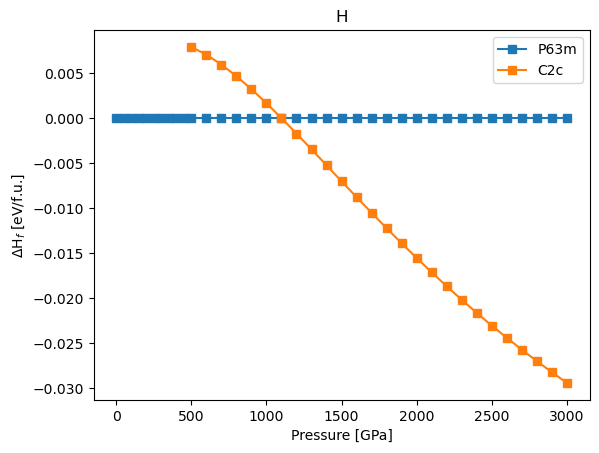

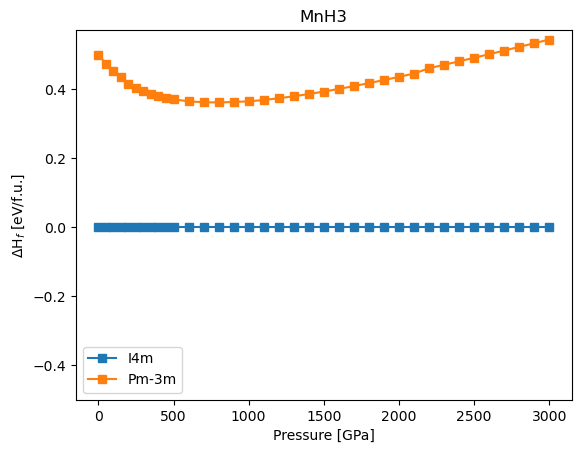

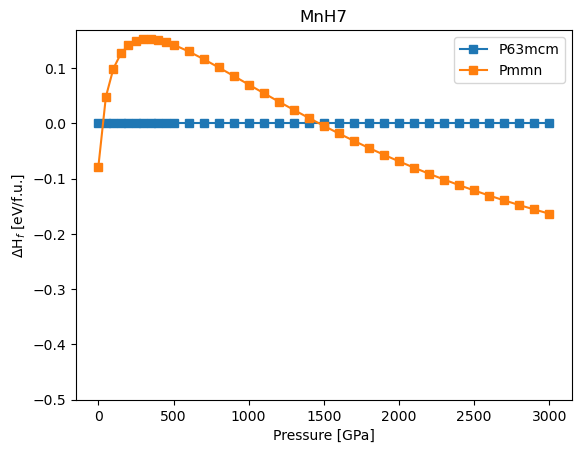

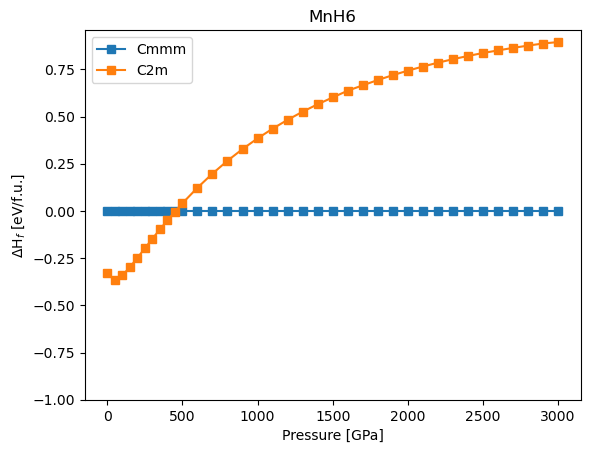

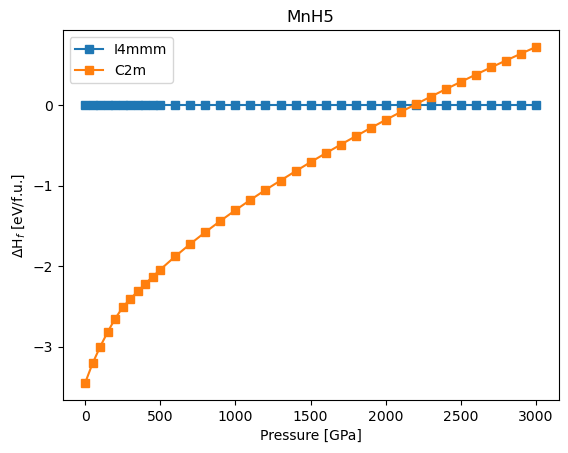

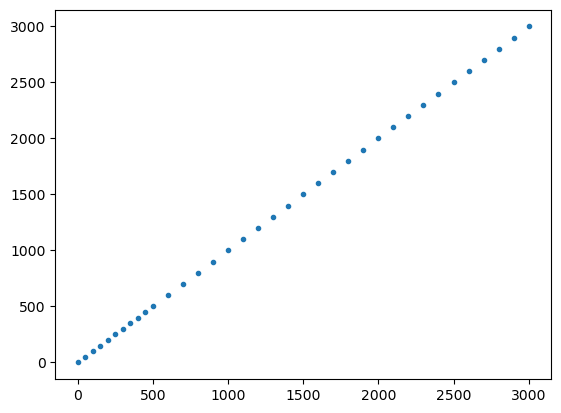

In [33]:
# Plot desired relative enthalpies

# define the baseline phase for each compound
Hf_base = {}
Hf_base["H"] = "P63m"
Hf_base["MnH3"] = "I4m"
Hf_base["MnH7"] = "P63mcm"
Hf_base["MnH6"] = "Cmmm"
Hf_base["MnH5"] = "I4mmm"
#Hf_base["FeH4"] = "Cmmm"

#define (optional) escape reaction for each compound
Hf_escape = {}
#Hf_escape["CoH2"] = [["CoH", "H"]]
# Hf_escape["FeH4"] = [["FeH3", "H"]]

# function to obtain and plot relative enthalpies
def plot_dH_vs_pressure(cmpd, ylim=(None,None)):
    base_idx = phases[cmpd].index(Hf_base[cmpd])
    enth_base = np.ones([len(pressures),1+len(phases[cmpd])])*np.inf
    enth_base[:,0] = pressures
    for i, phase in enumerate(phases[cmpd]):
        for ip,p in enumerate(pressures):
            if p in phase_enthalpies[cmpd][i]:
                enth_base[ip,i+1] = phase_enthalpies[cmpd][i][np.where(phase_enthalpies[cmpd][i][:,0] == p)[0][0],1] - phase_enthalpies[cmpd][base_idx][ip,1]
        plt.plot(enth_base[:,0], enth_base[:,i+1], label=phase, marker="s")
    if cmpd in Hf_escape.keys():
        escape_base = np.ones([len(pressures),1+len(Hf_escape[cmpd])])*np.inf
        escape_base[:,0] = pressures
        for i, reaction in enumerate(Hf_escape[cmpd]):
            esc1 = reaction[0]
            esc2 = reaction[1]
            reactants = np.array([[compounds[esc1][0],compounds[esc2][0]],[compounds[esc1][1],compounds[esc2][1]]])
            product = np.array([compounds[cmpd][0],compounds[cmpd][1]])
            x = np.linalg.solve(reactants, product)
            for ip, p in enumerate(pressures):
                if p in enthalpies[esc1][:,0] and p in enthalpies[esc2][:,0]:
                    escape_base[ip,i+1] = x[0]*enthalpies[esc1][np.where(enthalpies[esc1][:,0] == p)[0][0],1] + x[1]*enthalpies[esc2][np.where(enthalpies[esc2][:,0] == p)[0][0],1] - phase_enthalpies[cmpd][base_idx][ip,1]
            plt.plot(escape_base[:,0], escape_base[:,i+1], marker='o', linestyle="dashed", label = esc1+" + "+esc2)
    plt.title(cmpd)
    plt.xlabel("Pressure [GPa]")
    plt.ylabel("$\Delta$H$_f$ [eV/f.u.]")
    plt.legend()
    plt.ylim(ylim)
    plt.show()
    
# list of plots to make
cmpd="H"
plot_dH_vs_pressure(cmpd)

cmpd="MnH3"
plot_dH_vs_pressure(cmpd, (-0.5,None))


cmpd="MnH7"
plot_dH_vs_pressure(cmpd, (-0.5,None))

cmpd="MnH6"
plot_dH_vs_pressure(cmpd, (-1,None))

cmpd="MnH5"
plot_dH_vs_pressure(cmpd, (None,None))

#cmpd="FeH4"
#plot_dH_vs_pressure(cmpd)
plt.plot(phase_enthalpies["MnH8"][0][:,0], phase_enthalpies["MnH8"][0][:,0], ".")